## Homework 1 
### Jiaqi Wu (USCID: 2947873567)
#### b Preprocessing and Exploratory data analysis

##### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

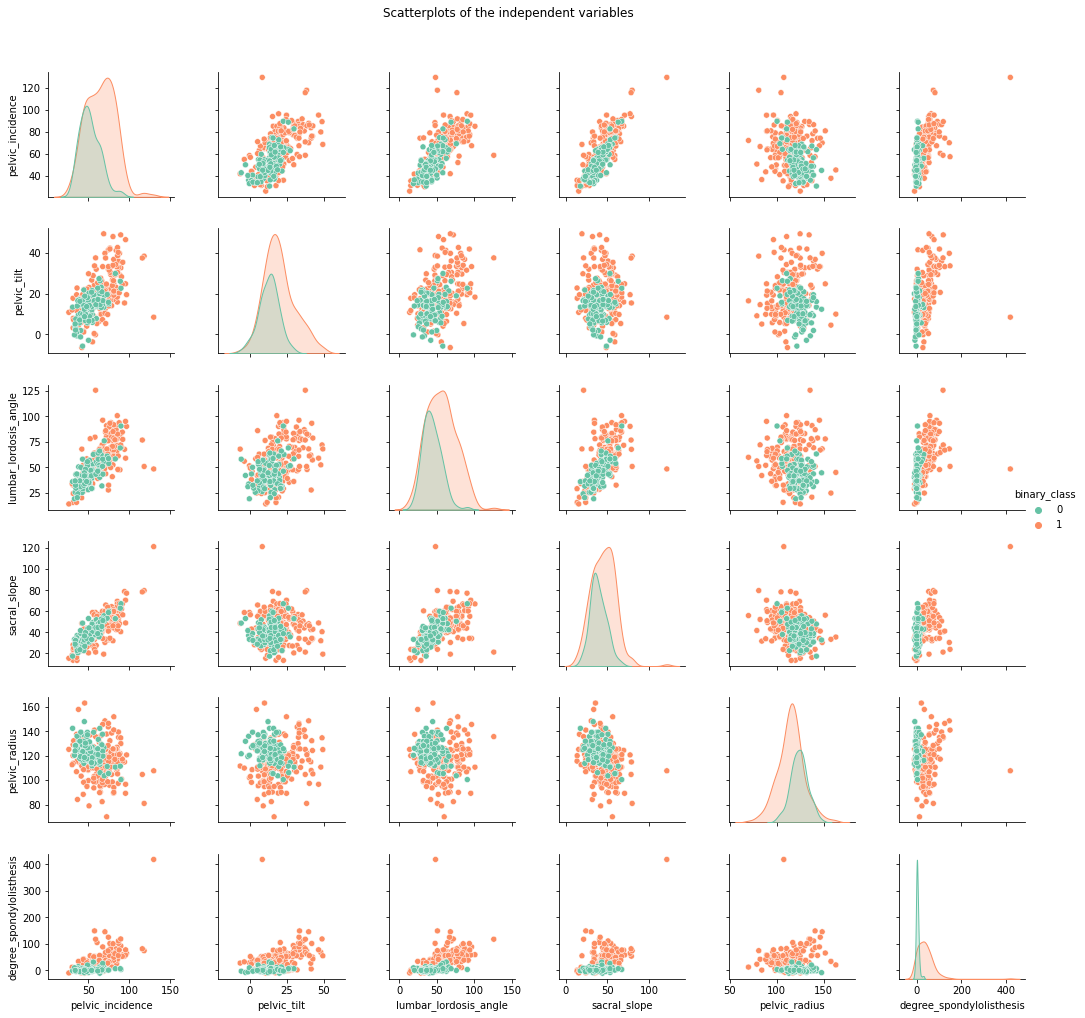

In [15]:
import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
import math

# Load the Data
column_2C_path = '../data/vertebral_column_data/column_2C_weka.arff'
column_2C_data, column_2C_meta = arff.loadarff(column_2C_path)
column_2C_df = pd.DataFrame(column_2C_data)

# Transfer class to 0&1
binary_class = []
for index, data in column_2C_df.iterrows():
    if data['class'].decode() == 'Abnormal':
        binary_class.append(1)
    else:
        binary_class.append(0)
column_2C_df['binary_class'] = binary_class

# Scatterplots
import seaborn as sns
import matplotlib.pyplot as plt

Vertebral_pairplot = sns.pairplot(column_2C_df, hue = 'binary_class', palette="Set2", diag_kind="kde", height=2.5, vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius','degree_spondylolisthesis' ])
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
Vertebral_pairplot.fig.suptitle('Scatterplots of the independent variables')
plt.show()

##### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 

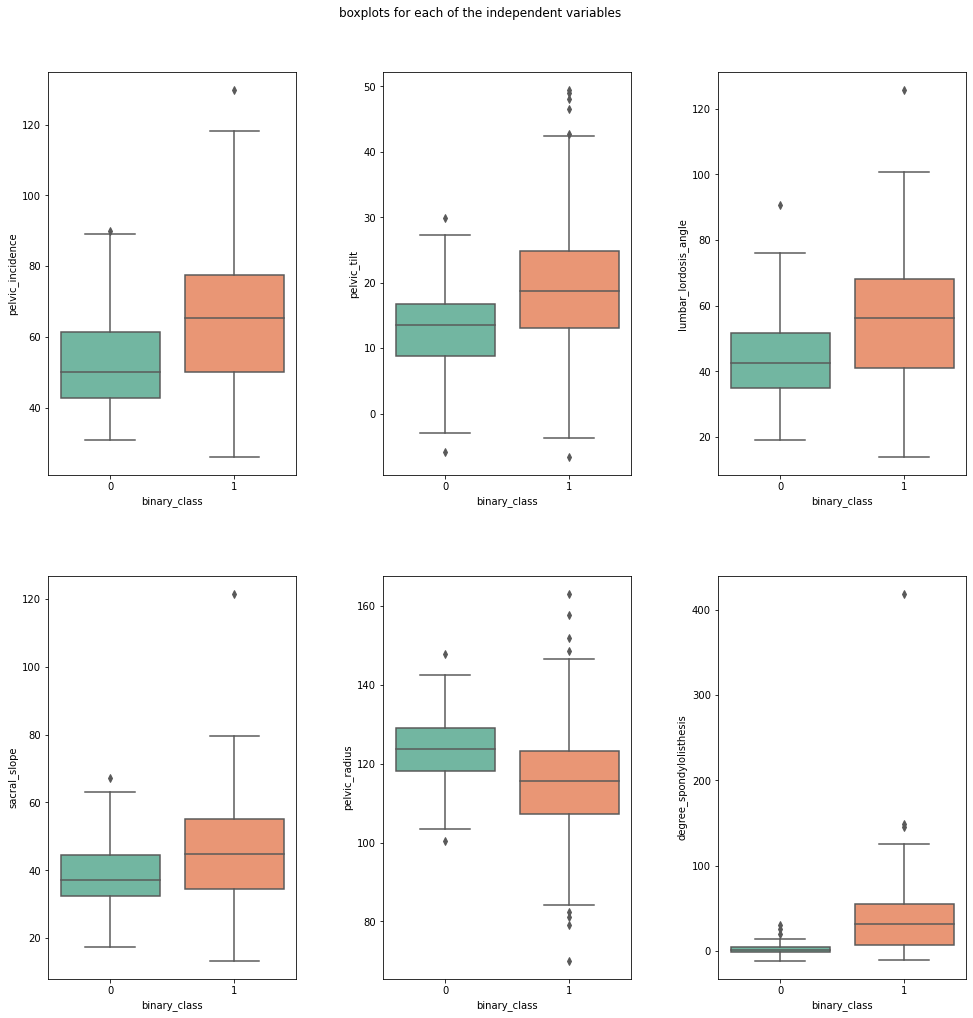

In [16]:
plt.figure(figsize=(15, 15))
plt.suptitle('boxplots for each of the independent variables')
plt.subplot(231)
sns.boxplot(x="binary_class", y="pelvic_incidence", palette="Set2", data=column_2C_df)
plt.subplot(232)
sns.boxplot(x="binary_class", y="pelvic_tilt", palette="Set2", data=column_2C_df)
plt.subplot(233)
sns.boxplot(x="binary_class", y="lumbar_lordosis_angle", palette="Set2", data=column_2C_df)
plt.subplot(234)
sns.boxplot(x="binary_class", y="sacral_slope", palette="Set2", data=column_2C_df)
plt.subplot(235)
sns.boxplot(x="binary_class", y="pelvic_radius", palette="Set2", data=column_2C_df)
plt.subplot(236)
sns.boxplot(x="binary_class", y="degree_spondylolisthesis", palette="Set2", data=column_2C_df)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

##### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [17]:
class_NO_df = column_2C_df[column_2C_df['binary_class'] == 0]
class_AB_df = column_2C_df[column_2C_df['binary_class'] == 1]
training_set = pd.concat([class_AB_df[:140],class_NO_df[:70]])
training_set_X = training_set[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]
training_set_Y = training_set[['binary_class']]
training_set_X = np.array(training_set_X.to_records(index = False).tolist())
training_set_Y = np.array(training_set_Y.to_records(index = False).tolist()).flatten()

test_set = pd.concat([class_AB_df[140:],class_NO_df[70:]])
test_set_X = test_set[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]
test_set_Y = test_set[['binary_class']]
test_set_X = np.array(test_set_X.to_records(index = False).tolist())
test_set_Y = np.array(test_set_Y.to_records(index = False).tolist()).flatten()

#### c Classification using KNN on Vertebral Column Data Set
##### i. Write code for k-nearest neighbors with Euclidean metric.(or use a software package).
  
##### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*.

Best k of Euclidean: [4]
Minimum Test Error Rate: 0.06000000000000005
Minimum Train Error Rate: 0.0


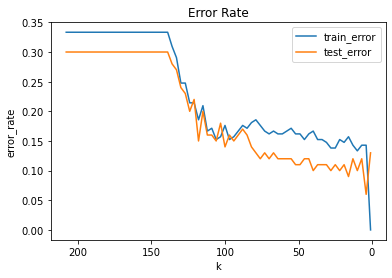

Confusion Matrix
[[25  5]
 [ 1 69]]
True positive rate:  0.9857142857142858
True negative rate:  0.8333333333333334
Precision:  0.9324324324324325
F1-score:  0.9583333333333333
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score

k = 208
error_X = []
test_error_Y = []
train_error_Y = []
min_k = []
min_error_rate = 1
min_train_error = 1
while k >= 1:
    Euclidean_model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    Euclidean_model.fit(training_set_X, training_set_Y)
    Euclidean_pred_test = Euclidean_model.predict(test_set_X)
    Euclidean_pred_train = Euclidean_model.predict(training_set_X)
    error_rate_test = 1-accuracy_score(test_set_Y, Euclidean_pred_test)
    error_rate_train = 1-accuracy_score(training_set_Y, Euclidean_pred_train)
    error_X.append(k)
    test_error_Y.append(error_rate_test)
    train_error_Y.append(error_rate_train)
    if error_rate_test < min_error_rate:
        min_error_rate = error_rate_test
        min_k = [k]
    elif error_rate_test == min_error_rate:
        min_k.append(k)
    if error_rate_train < min_train_error:
        min_train_error = error_rate_train
    k = k-3

print('Best k of Euclidean:', min_k)
print('Minimum Test Error Rate:', min_error_rate)
print('Minimum Train Error Rate:', min_train_error)
import matplotlib.pyplot as plt
plt.title('Error Rate')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(error_X, train_error_Y, label = 'train_error')
plt.plot(error_X, test_error_Y, label = 'test_error')
plt.legend()
plt.show()

# k* = 4
Euclidean_model = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
Euclidean_model.fit(training_set_X, training_set_Y)
Euclidean_pred = Euclidean_model.predict(test_set_X)
# Confusion Matrix
Euclidean_confusion_matrix = confusion_matrix(test_set_Y, Euclidean_pred)
# True positive rate
# TPR = TP/TP+FN
tn, fp, fn, tp = Euclidean_confusion_matrix.ravel()
Euclidean_TPR = tp/(tp+fn)
# True negative rate
# TNR = TN/TN+FP
Euclidean_TNR = tn/(tn+fp)
# Precision
Euclidean_precision = precision_score(test_set_Y, Euclidean_pred)
# F1-score
Euclidean_f1 = f1_score(test_set_Y, Euclidean_pred)
print('Confusion Matrix')
print(Euclidean_confusion_matrix)
print('True positive rate: ', Euclidean_TPR)
print('True negative rate: ', Euclidean_TNR)
print('Precision: ', Euclidean_precision)
print('F1-score: ', Euclidean_f1)
print(classification_report(test_set_Y, Euclidean_pred))

##### iii. Plot the best test error rate.

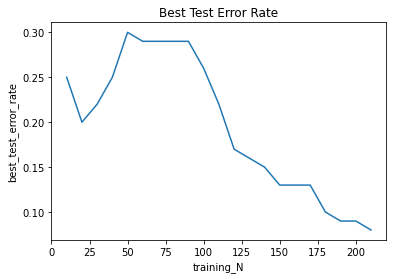

In [19]:
# Plot best test error rate
N = 10
test_error_X = []
test_error_Y = []
while N <= 210:
    test_error_X.append(N)
    AB_count = N-int(N/3)
    NO_count = int(N/3)
    # generate new training set
    train_X = np.concatenate((training_set_X[:AB_count],training_set_X[140:140+NO_count]), axis = 0)
    train_Y = np.concatenate((training_set_Y[:AB_count],training_set_Y[140:140+NO_count]), axis = 0)
    k = 1
    min_error_rate = 1
    # select best k
    while k < N:
        KNN = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        KNN.fit(train_X, train_Y)
        pred = KNN.predict(test_set_X)
        error_rate = 1-accuracy_score(test_set_Y, pred)
        if error_rate < min_error_rate:
            min_error_rate = error_rate
        k += 5
    # append best error rate
    test_error_Y.append(min_error_rate)
    N += 10

import matplotlib.pyplot as plt
plt.title('Best Test Error Rate')
plt.xlabel('training_N')
plt.ylabel('best_test_error_rate')
plt.plot(test_error_X, test_error_Y)

#### d Try other metrics.
##### i. Minkowski Distance   
A. Manhattan Distance with p = 1.

Best k of manhattan:  [26, 11, 6, 1]
Test error of manhattan:  0.10999999999999999


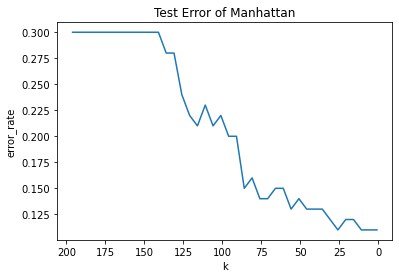

In [20]:
k = 196
test_error_X = []
test_error_Y = []
max_accuracy_manhattan = 0
max_f1_manhattan = 0
max_precision_manhattan = 0
best_k_manhattan = []
while k >= 1:
    KNN = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
    KNN.fit(training_set_X, training_set_Y)
    pred = KNN.predict(test_set_X)
    accuracy = accuracy_score(test_set_Y, pred)
    precision = precision_score(test_set_Y, pred)
    f1 = f1_score(test_set_Y, pred)
    if accuracy > max_accuracy_manhattan:
        max_accuracy_manhattan = accuracy
        best_k_manhattan = [k]
        #print('k:',k,'error_rate:',1-accuracy)
    elif accuracy == max_accuracy_manhattan:
        best_k_manhattan.append(k)
    test_error_X.append(k)
    test_error_Y.append(1-accuracy)
    k = k-5
# Best K: 26, 11, 6, 1
print('Best k of manhattan: ', best_k_manhattan)
print('Test error of manhattan: ', 1-max_accuracy_manhattan)
plt.title('Test Error of Manhattan')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(test_error_X, test_error_Y)

B. Best log10(p)

In [21]:
import math
log = 0.1
max_accuracy_minkowski = 0
max_f1_minkowski = 0
max_precision_minkowski = 0
best_log = []
test_error_X = []
test_error_Y = []
while log <= 1:
    KNN = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = math.pow(10,log))
    KNN.fit(training_set_X, training_set_Y)
    pred = KNN.predict(test_set_X)
    accuracy = accuracy_score(test_set_Y, pred)
    if accuracy > max_accuracy_minkowski:
        max_accuracy_minkowski = accuracy
        best_log = [log]
    elif accuracy == max_accuracy_minkowski:
        best_log.append(log)
    test_error_X.append(log)
    test_error_Y.append(1-accuracy)
    log += 0.1
    
print('Best log10(p) [k=6]: ', best_log)
print('Test error of minkowski: ', 1-max_accuracy_minkowski)



Best log10(p) [k=6]:  [0.6]
Test error of minkowski:  0.06000000000000005


C. Chebyshev

Best k of chebyshev:  [16]
Test error of chebyshev:  0.07999999999999996


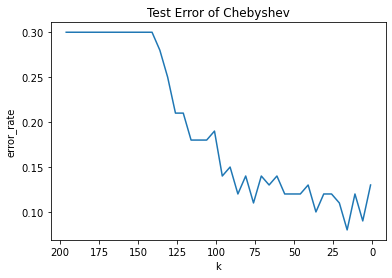

In [22]:
k = 196
max_accuracy_chebyshev = 0
max_f1_chebyshev = 0
max_precision_chebyshev = 0
best_k_chebyshev = []
test_error_X = []
test_error_Y = []
while k >= 1:
    KNN = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev')
    KNN.fit(training_set_X, training_set_Y)
    pred = KNN.predict(test_set_X)
    accuracy = accuracy_score(test_set_Y, pred)
    precision = precision_score(test_set_Y, pred)
    f1 = f1_score(test_set_Y, pred)
    if accuracy > max_accuracy_chebyshev:
        max_accuracy_chebyshev = accuracy
        best_k_chebyshev = [k]
    elif accuracy == max_accuracy_chebyshev:
        best_k_chebyshev.append(k)
    test_error_X.append(k)
    test_error_Y.append(1-accuracy)
    k = k-5
print('Best k of chebyshev: ', best_k_chebyshev)
print('Test error of chebyshev: ', 1-max_accuracy_chebyshev)
plt.title('Test Error of Chebyshev')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(test_error_X, test_error_Y)

##### ii. Mahalanobis

Best k of mahalanobis:  [1]
Test error of mahalanobis:  0.12


/Users/kw/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/Users/kw/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/Users/kw/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/Users/kw/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/Users/kw/op

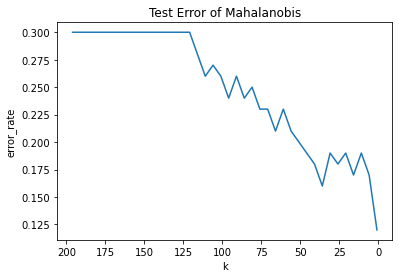

In [23]:
cov = np.cov(training_set_X, rowvar = False)
#inv = np.linalg.inv(np.cov(training_set_X.T)).T
#inv = np.linalg.inv(np.cov(training_set_X))
max_accuracy_mahalanobis = 0
max_f1_mahalanobis = 0
max_precision_mahalanobis = 0
best_k_mahalanobis = []
test_error_X = []
test_error_Y = []
k = 196
while k >= 1:
    KNN = KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis', metric_params={'V': cov})
    KNN.fit(training_set_X, training_set_Y)
    pred = KNN.predict(test_set_X)
    accuracy = accuracy_score(test_set_Y, pred)
    precision = precision_score(test_set_Y, pred)
    f1 = f1_score(test_set_Y, pred)
    if accuracy > max_accuracy_mahalanobis:
        max_accuracy_mahalanobis = accuracy
        best_k_mahalanobis = [k]
    elif accuracy == max_accuracy_mahalanobis:
        best_k_mahalanobis.append(k)
    test_error_X.append(k)
    test_error_Y.append(1-accuracy)
    k = k-5
print('Best k of mahalanobis: ', best_k_mahalanobis)
print('Test error of mahalanobis: ', 1-max_accuracy_mahalanobis)
plt.title('Test Error of Mahalanobis')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(test_error_X, test_error_Y)

In [24]:
import pandas as pd
comparison_of_metrics = {
    'Metric':['Euclidean','Manhattan','Minkowski','Chebyshev','Mahalanobis'],
    'Best Test Error':[round(1-accuracy_score(test_set_Y, Euclidean_pred),2),round(1-max_accuracy_manhattan,2),round(1-max_accuracy_minkowski,2),round(1-max_accuracy_chebyshev,2),round(1-max_accuracy_mahalanobis,2)]
}
pd.DataFrame(comparison_of_metrics)

,Metric,Best Test Error
0,Euclidean,0.06
1,Manhattan,0.11
2,Minkowski,0.06
3,Chebyshev,0.08
4,Mahalanobis,0.12


##### e Replace the majority polling decision by weighted decision.

Best k of Euclidean (weighted_decision):  [6]
Test error of euclidean (weighted_decision):  0.09999999999999998


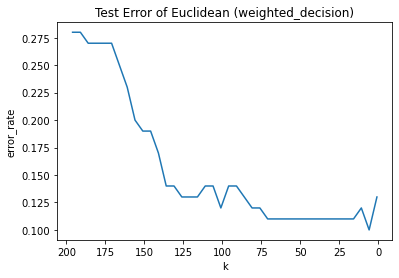

In [25]:
k = 196
max_accuracy_euclidean_dist = 0
max_f1_euclidean_dist = 0
max_precision_euclidean_dist = 0
best_k_euclidean_dist = []
test_error_X = []
test_error_Y = []
while k >= 1:
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'euclidean')
    KNN.fit(training_set_X, training_set_Y)
    pred = KNN.predict(test_set_X)
    accuracy = accuracy_score(test_set_Y, pred)
    precision = precision_score(test_set_Y, pred)
    f1 = f1_score(test_set_Y, pred)
    if accuracy > max_accuracy_euclidean_dist:
        max_accuracy_euclidean_dist = accuracy
        max_f1_euclidean_dist = f1
        max_precision_euclidean_dist = precision
        best_k_euclidean_dist = [k]
    elif accuracy == max_accuracy_euclidean_dist:
        best_k_euclidean_dist.append(k)
    test_error_X.append(k)
    test_error_Y.append(1-accuracy)
    k = k-5
print('Best k of Euclidean (weighted_decision): ', best_k_euclidean_dist)
print('Test error of euclidean (weighted_decision): ', 1-max_accuracy_euclidean_dist)
plt.title('Test Error of Euclidean (weighted_decision)')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(test_error_X, test_error_Y)

Best k of manhattan (weighted_decision):  [26]
Test error of Manhattan (weighted_decision):  0.09999999999999998


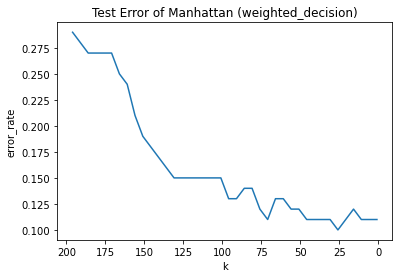

In [26]:
k = 196
max_accuracy_manhattan_dist = 0
max_f1_manhattan_dist = 0
max_precision_manhattan_dist = 0
best_k_manhattan_dist = []
test_error_X = []
test_error_Y = []
while k >= 1:
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'manhattan')
    KNN.fit(training_set_X, training_set_Y)
    pred = KNN.predict(test_set_X)
    accuracy = accuracy_score(test_set_Y, pred)
    precision = precision_score(test_set_Y, pred)
    f1 = f1_score(test_set_Y, pred)
    if accuracy > max_accuracy_manhattan_dist:
        max_accuracy_manhattan_dist = accuracy
        best_k_manhattan_dist = [k]
    elif accuracy == max_accuracy_manhattan_dist:
        best_k_manhattan_dist.append(k)
    test_error_X.append(k)
    test_error_Y.append(1-accuracy)
    k = k-5
print('Best k of manhattan (weighted_decision): ', best_k_manhattan_dist)
print('Test error of Manhattan (weighted_decision): ', 1-max_accuracy_manhattan_dist)
plt.title('Test Error of Manhattan (weighted_decision)')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(test_error_X, test_error_Y)

Best k of Chebyshev (weighted_decision):  [61, 41, 36, 31, 16]
Test error of chebyshev (weighted_decision):  0.10999999999999999


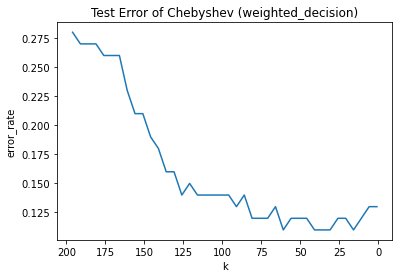

In [27]:
k = 196
max_accuracy_chebyshev_dist = 0
max_f1_chebyshev_dist = 0
max_precision_chebyshev_dist = 0
best_k_chebyshev_dist = []
test_error_X = []
test_error_Y = []
while k >= 1:
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'chebyshev')
    KNN.fit(training_set_X, training_set_Y)
    pred = KNN.predict(test_set_X)
    accuracy = accuracy_score(test_set_Y, pred)
    precision = precision_score(test_set_Y, pred)
    f1 = f1_score(test_set_Y, pred)
    if accuracy > max_accuracy_chebyshev_dist:
        max_accuracy_chebyshev_dist = accuracy
        best_k_chebyshev_dist = [k]
    elif accuracy == max_accuracy_chebyshev_dist:
        best_k_chebyshev_dist.append(k)
    test_error_X.append(k)
    test_error_Y.append(1-accuracy)
    k = k-5
print('Best k of Chebyshev (weighted_decision): ', best_k_chebyshev_dist)
print('Test error of chebyshev (weighted_decision): ', 1-max_accuracy_chebyshev_dist)
plt.title('Test Error of Chebyshev (weighted_decision)')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.gca().invert_xaxis() 
plt.plot(test_error_X, test_error_Y)

In [28]:
import pandas as pd
comparison_of_metrics_and_decision = {
    'Metric':['Euclidean','Manhattan','Chebyshev'],
    'weighted decision':[round(1-max_accuracy_euclidean_dist,2),round(1-max_accuracy_manhattan_dist,2),round(1-max_accuracy_chebyshev_dist,2)],
    'majority polling':[round(1-accuracy_score(test_set_Y, Euclidean_pred),2),round(1-max_accuracy_manhattan,2),round(1-max_accuracy_chebyshev,2)]
}
pd.DataFrame(comparison_of_metrics_and_decision)

,Metric,weighted decision,majority polling
0,Euclidean,0.10,0.06
1,Manhattan,0.10,0.11
2,Chebyshev,0.11,0.08


##### f The lowest training error rate is 0.0.